<a href="https://colab.research.google.com/github/Raksitha-R/fakenews-detection/blob/main/fakelstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas nltk spacy gensim tensorflow


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
import spacy
from gensim.models import Word2Vec
import string
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')  # Download punkt_tab data package for NLTK

# Install and load the English NLP model for spaCy
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load the dataset
file_path = '/content/fake_and_real_news.csv'  # Make sure the file is uploaded in the Colab environment
data = pd.read_csv(file_path)

# Sample text for demonstration purposes
sample_text = data['Text'][0]

# 1. Tokenization: Breaking the text into words or sentences
sentence_tokens = sent_tokenize(sample_text)  # Sentence tokenization
word_tokens = word_tokenize(sample_text)      # Word tokenization

# 2. Normalization: Lowercasing and removing punctuation
normalized_tokens = [word.lower() for word in word_tokens if word.isalnum()]

# 3. Stopword Removal: Removing common English stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in normalized_tokens if word not in stop_words]

# 4. N-Grams: Creating unigrams, bigrams, and trigrams
unigrams = list(ngrams(filtered_tokens, 1))
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))

# 5. Word Embeddings: Using Word2Vec to generate dense word representations
word2vec_model = Word2Vec([filtered_tokens], vector_size=100, window=5, min_count=1, workers=4)
word_embeddings = {word: word2vec_model.wv[word] for word in filtered_tokens}

# 6. Named Entity Recognition (NER): Extracting entities using spaCy
doc = nlp(sample_text)
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Output results
results = {
    "Sentence Tokens": sentence_tokens,
    "Word Tokens": word_tokens,
    "Normalized Tokens": normalized_tokens,
    "Filtered Tokens": filtered_tokens,
    "Unigrams": unigrams[:5],  # Displaying first 5 for brevity
    "Bigrams": bigrams[:5],
    "Trigrams": trigrams[:5],
    "Named Entities": named_entities,
    "Sample Word Embedding": word_embeddings.get(filtered_tokens[0], "N/A")  # Embedding for first filtered token
}

Word Frequency Plot:


<ipython-input-5-1b22297c7436>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


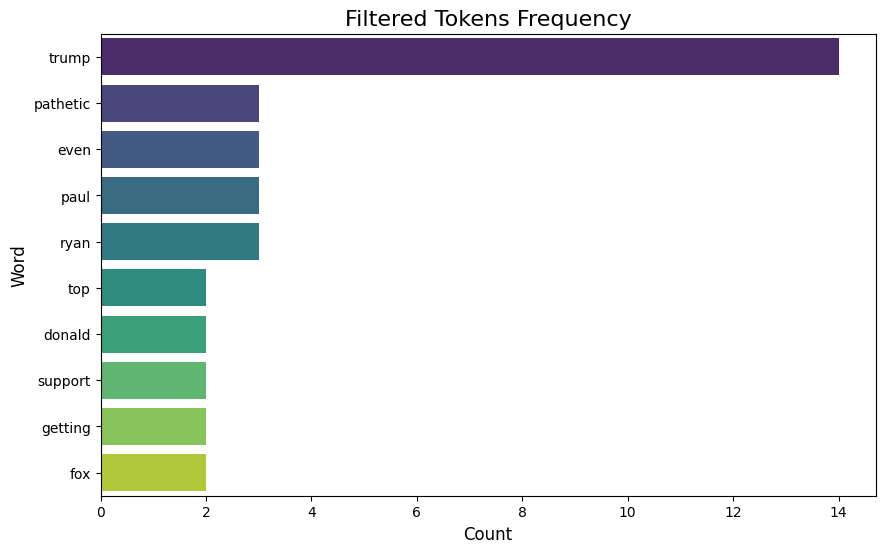

Word Cloud:


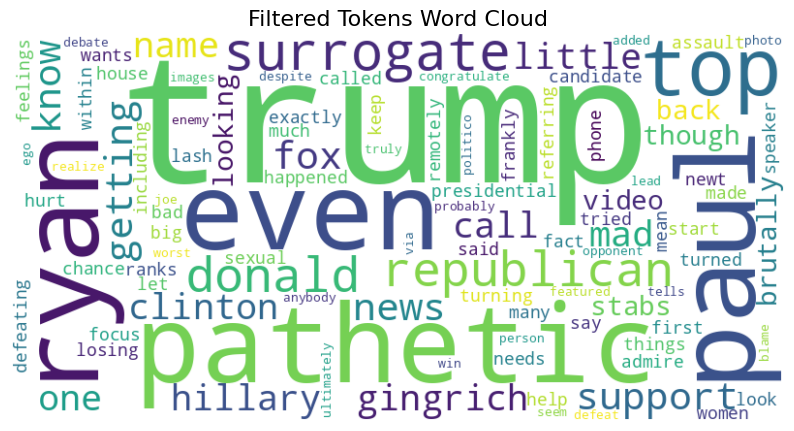

Bigram Frequency Plot:


<ipython-input-5-1b22297c7436>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=[' '.join(ngram) for ngram in ngrams_labels], palette="viridis")


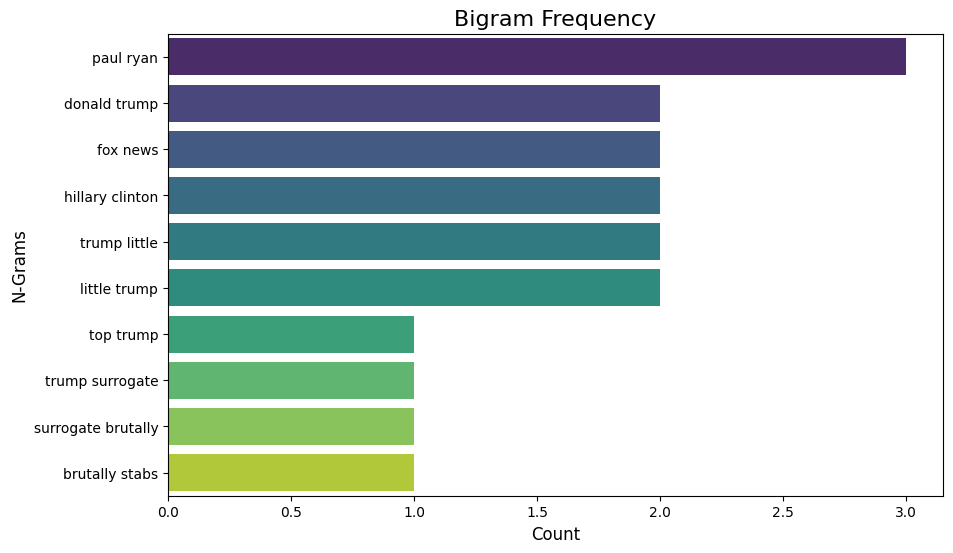

Named Entity Visualization:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
import spacy

# Visualization Functions
def plot_word_frequency(tokens, title="Word Frequency"):
    word_counts = Counter(tokens)
    common_words = word_counts.most_common(10)  # Top 10 words
    words, counts = zip(*common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Word", fontsize=12)
    plt.show()

def plot_wordcloud(tokens, title="Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

def plot_ngrams(ngrams_list, title="N-Gram Frequency"):
    ngram_counts = Counter(ngrams_list)
    common_ngrams = ngram_counts.most_common(10)  # Top 10 n-grams
    ngrams_labels, counts = zip(*common_ngrams)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=[' '.join(ngram) for ngram in ngrams_labels], palette="viridis")
    plt.title(title, fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("N-Grams", fontsize=12)
    plt.show()

# Load the dataset
file_path = '/content/fake_and_real_news.csv'  # Make sure the file is uploaded in the Colab environment
data = pd.read_csv(file_path)

# Process a sample text
sample_text = data['Text'][0]

# Tokenization
word_tokens = word_tokenize(sample_text)

# Normalization
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in word_tokens if word.isalnum() and word.lower() not in stop_words]

# N-Grams
bigrams = list(ngrams(filtered_tokens, 2))
trigrams = list(ngrams(filtered_tokens, 3))

# Named Entity Recognition using spaCy
nlp = spacy.load('en_core_web_sm')
doc = nlp(sample_text)

# Visualizations
print("Word Frequency Plot:")
plot_word_frequency(filtered_tokens, title="Filtered Tokens Frequency")

print("Word Cloud:")
plot_wordcloud(filtered_tokens, title="Filtered Tokens Word Cloud")

print("Bigram Frequency Plot:")
plot_ngrams(bigrams, title="Bigram Frequency")

print("Named Entity Visualization:")
spacy.displacy.render(doc, style="ent", jupyter=True)


In [ ]:
# Prepare the labels (real/fake)
texts = data['Text'].apply(lambda x: x)  # Assuming the text is already preprocessed or you apply necessary preprocessing

# Handle missing values in the 'label' column before mapping
data['label'] = data['label'].fillna('unknown')  # Replace NaN with 'unknown' or any other placeholder
labels = data['label'].map({'real': 1, 'fake': 0})

# Replace NaN values in labels with 0
# (or any other integer within the range of your classes)
labels = labels.fillna(0).astype(int)

# Filter out rows with 'unknown' labels if necessary. However, since you are replacing 'unknown' with 0, this might not be needed.
#valid_indices = np.where(labels != -9223372036854775808)[0] # Assuming -9223372036854775808 represents 'unknown'
#texts = texts[valid_indices]
#labels = labels[valid_indices]

# Tokenize the texts
tokenizer = Tokenizer(num_words=5000)  # Limit the vocabulary size to 5000 most frequent words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they have the same length
max_length = 300  # Adjust the maximum sequence length based on your data
X = pad_sequences(sequences, maxlen=max_length)

# Convert labels to one-hot encoding (real = 1, fake = 0)
y = to_categorical(labels, num_classes=2)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 106s 830ms/step - accuracy: 0.9768 - loss: 0.1581 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 137s 789ms/step - accuracy: 1.0000 - loss: 1.5070e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 790ms/step - accuracy: 1.0000 - loss: 7.2139e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 793ms/step - accuracy: 1.0000 - loss: 5.2178e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 94s 761ms/step - accuracy: 1.0000 - loss: 8.3094e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


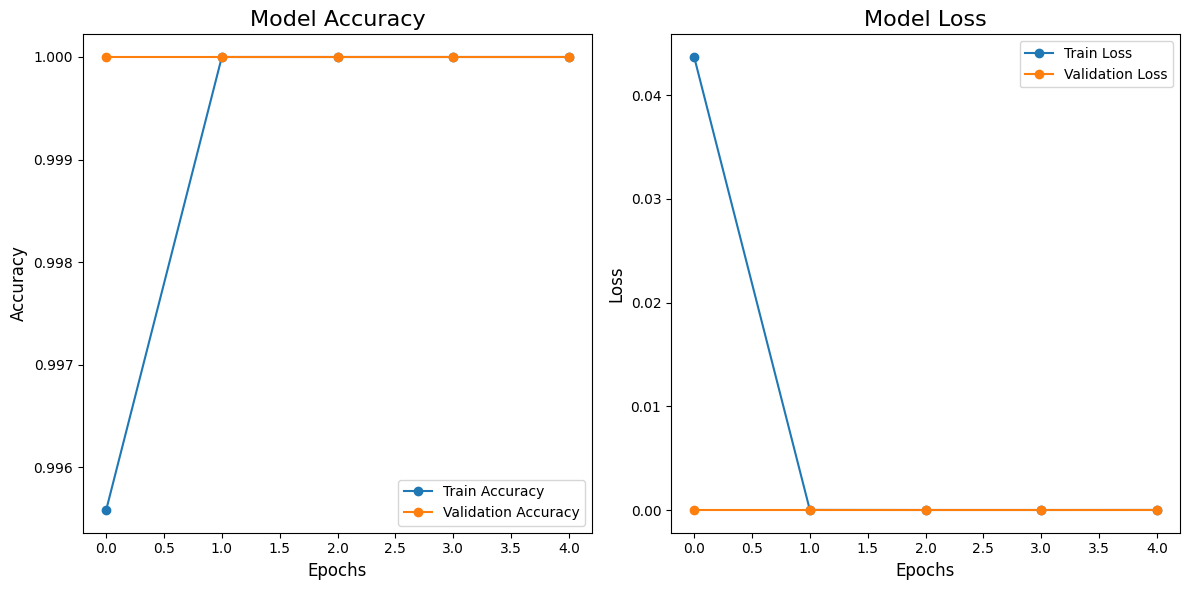

Training Loss: 0.0000, Training Accuracy: 1.0000
Validation Loss: 0.0000, Validation Accuracy: 1.0000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()

# Add the embedding layer for word embeddings
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_length))

# Add LSTM layer
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Add a dense layer for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer (binary classification: real or fake)
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Visualizing Training and Validation Accuracy/Loss
def plot_training_history(history):
    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Calculate error values
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Loss: {test_loss:.4f}, Validation Accuracy: {test_accuracy:.4f}")
model.save("news_classification_model.h5")
from google.colab import files
files.download("news_classification_model.h5")



In [ ]:
def predict_news(model, input_text, tokenizer, max_length):
    # Preprocess the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the input text
    input_padded = pad_sequences(input_sequence, maxlen=max_length)  # Pad the sequence to match the model's input length

    # Make prediction
    prediction = model.predict(input_padded)
    predicted_class = prediction.argmax(axis=-1)  # Get the class with the highest probability

    # Map the predicted class to its label
    label_map = {0: "Fake News", 1: "Real News"}
    return label_map[predicted_class[0]], prediction

# Example usage
input_news = "Trump on Twitter (August 8): Opioid crisis, North Korea The following statementsÂ were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own.Â Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - I will be holding a major briefing on the Opioid crisis, a major problem for our country, today at 3:00 P.M. in Bedminster, N.J. [0711 EDT] - After many years of failure, countries are coming together to  finally address the dangers posed by North Korea. We must be tough & decisive! [0717 EDT] - E-mails show that the AmazonWashingtonPost and the FailingNewYorkTimes were reluctant to cover the Clinton/Lynch secret meeting in plane. [1400 EDT] - After 200 days, rarely has any Administration achieved what we have achieved..not even close! Donâ€™t believe the Fake News Suppression Polls! [1410 EDT] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) "
predicted_label, prediction_probabilities = predict_news(model, input_news, tokenizer, max_length)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probabilities}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label: Fake News
Prediction Probabilities: [[1.00000e+00 2.92936e-10]]


In [ ]:
model.save("news_classification_model.h5")
from google.colab import files
files.download("news_classification_model.h5")